# Numerical evaluationn of the Fresnel Integral

Fresnel functions are used in optics to describe near-field diffraction. They can be written as an integral (or infinite sum):

$S(x)=\int_0^x \sin(\pi t^2/2)dt$

Below we use scipy implementation of the Fresnel integral to test our evaluation using the midpoint, trapezoid, and Simpson's rule integration.


x point in file: 20.0


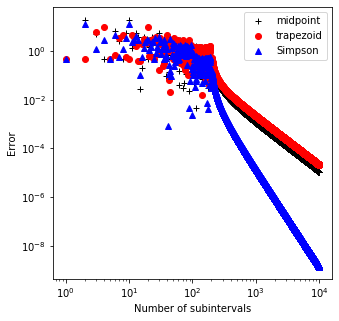

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc


# Open file to get limits of integration
with open('fres_int_output.dat','r') as f:
    x_point=float(f.readline().split()[2])
    print('x point in file:',x_point)

# Scipy has Fresnel integral
S,C=sc.fresnel(x_point)

# Use numpy to read in the data
fres_int_results=np.loadtxt('fres_int_output.dat',usecols=range(0,4))

# Plot the data
fig_num_int,ax1=plt.subplots(figsize=(5,5))

ax1.plot(fres_int_results[:,0],abs(fres_int_results[:,1]-S),'k+',label='midpoint')
ax1.plot(fres_int_results[:,0],abs(fres_int_results[:,2]-S),'ro',label='trapezoid')
ax1.plot(fres_int_results[:,0],abs(fres_int_results[:,3]-S),'b^',label='Simpson')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Number of subintervals')
ax1.set_ylabel('Error')
ax1.legend()

plt.savefig('Error_Fres_Int.pdf',bbox_inches='tight')
plt.show()